In [1]:
import mlflow
import mlflow.sklearn
import pandas as pd
import os, sys, joblib


In [23]:
sys.path.append(os.path.abspath('..'))


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from src.model_training import SplitData, TrainData, EvaluateModel
from src.encoding import DataProcessing

In [5]:
df = pd.read_csv('../data/creditcard.csv')


In [10]:
dp = DataProcessing(df)


In [11]:
encoded_data = dp.encode_data()
encoded_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [12]:
encoded_data = encoded_data.drop('Class', axis=1)
encoded_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [13]:
standard_data = dp.standardize_data(encoded_data)
standard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [15]:
index = df.columns.get_loc('Amount')
my_value = df['Class']
standard_data.insert(index + 1, 'Class', my_value)
standard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


In [16]:
standard_data.to_csv('../data/standard_credit_data.csv', index=False)


In [17]:
x = standard_data.drop('Class', axis=1)
y = standard_data['Class']

In [18]:
sd = SplitData( x, y )
x_train, x_test, y_train, y_test = sd.split_data()

In [19]:
td = TrainData(x_train, y_train)


In [24]:
#mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("decision_tree_Classifier for credit card fraud detection")
with mlflow.start_run():
    #model training
    decision_tree_model = td.decision_tree_Classifier()
    eval = EvaluateModel()
    accuracy, precision, recall, f1, roc_auc = [], [], [], [], []
    accuracy, precision, recall, f1, roc_auc, _ = eval.evaluate_model(decision_tree_model, x_test, y_test)

    #logging parameters, metrics, model
    mlflow.log_param("random_state", 42)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.sklearn.log_model(decision_tree_model, "decision_tree_model")
joblib.dump(decision_tree_model, filename = '../DTM.pkl', compress = 3)



2025/02/18 16:41:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


['../DTM.pkl']

In [26]:

mlflow.set_experiment("xg_model for credit card fraud detection")
with mlflow.start_run():
    #model training
    xg_model = td.xgboost_classifier()
    eval = EvaluateModel()
    accuracy, precision, recall, f1, roc_auc = [], [], [], [], []
    accuracy, precision, recall, f1, roc_auc, _ = eval.evaluate_model(xg_model, x_test, y_test)

    #logging parameters, metrics, model
    mlflow.log_param("random_state", 42)
    mlflow.log_param("scale_pos_weight", 49)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.sklearn.log_model(xg_model, "xg_model")

joblib.dump(xg_model, filename = '../XGM.pkl', compress = 3)

2025/02/18 16:42:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


['../XGM.pkl']

In [27]:

mlflow.set_experiment("random_forest_model")
with mlflow.start_run():
    #model training
    random_forest_model = td.random_forest()
    eval = EvaluateModel()
    accuracy, precision, recall, f1, roc_auc = [], [], [], [], []
    accuracy, precision, recall, f1, roc_auc, _ = eval.evaluate_model(random_forest_model, x_test, y_test)

    #logging parameters, metrics, model
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("n_jobs", -1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.sklearn.log_model(random_forest_model, "random_forest_model")
joblib.dump(random_forest_model, filename = '../RF.pkl', compress = 3)


2025/02/18 16:43:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


['../RF.pkl']

In [ ]:
eval = EvaluateModel()
accuracy_value, precision_value, recall_value, f1_value, roc_auc_value = [], [], [], [], []
models = ['Decision_tree', 'RandomForest', 'XGBOOST']

for model in [decision_tree_model, random_forest_model, xg_model]:
    accuracy, precision, recall, f1, roc_auc, _ = eval.evaluate_model(model, x_test, y_test)
    accuracy_value.append(accuracy)
    precision_value.append(precision)
    recall_value.append(recall) 
    f1_value.append(f1) 
    roc_auc_value.append(roc_auc) 


for i, model_name in enumerate(models):
    print(f'Evaluate result for {model_name}: ')
    print(f'      Accuracy: {accuracy_value[i]} ')
    print(f'      precision score: {precision_value[i]} ')
    print(f'      recall   {recall_value[i]}')
    print(f'      f1_score  {f1_value[i]}')
    print(f'      roc_auc score  {roc_auc_value[i]}')

                    model explainability for decision tree trained model

c:\Users\Temp\Desktop\KAI-Projects\Fraud-detection-in-Ecommerce-and-credit-card\week8\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Figure size 640x480 with 0 Axes>

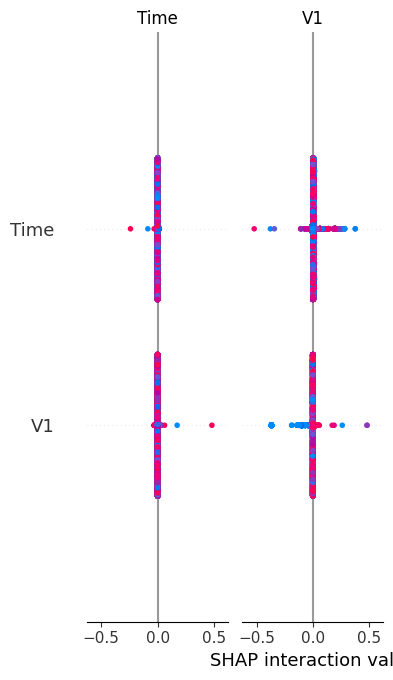

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [30]:
from src.model_explainability import ModelExplainability
fearures = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

me = ModelExplainability( decision_tree_model, x_train, x_test, fearures)
me.explain_with_shap()

In [31]:
me.explain_with_lime()


c:\Users\Temp\Desktop\KAI-Projects\Fraud-detection-in-Ecommerce-and-credit-card\week8\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\Temp\Desktop\KAI-Projects\Fraud-detection-in-Ecommerce-and-credit-card\week8\lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\Temp\Desktop\KAI-Projects\Fraud-detection-in-Ecommerce-and-credit-card\week8\lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getit

                        model explainability for Random Forest  trained model

100%|===================| 113788/113924 [10:56<00:00]        

<Figure size 640x480 with 0 Axes>

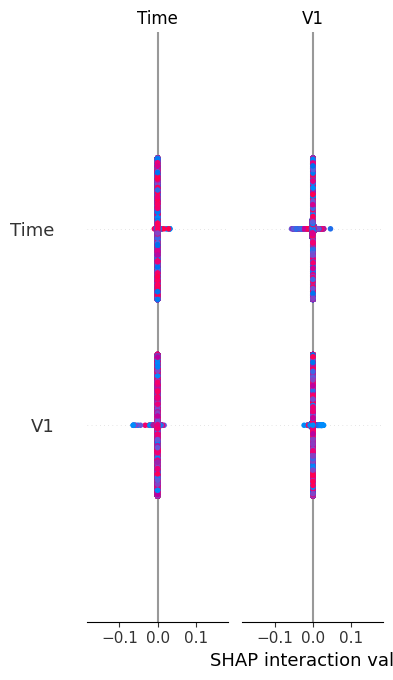

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [32]:
fearures = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

me = ModelExplainability( random_forest_model, x_train, x_test, fearures)
me.explain_with_shap()

In [ ]:
me.explain_with_lime()

                    model explainability for xg boost trained model

100%|===================| 56877/56962 [03:43<00:00]        

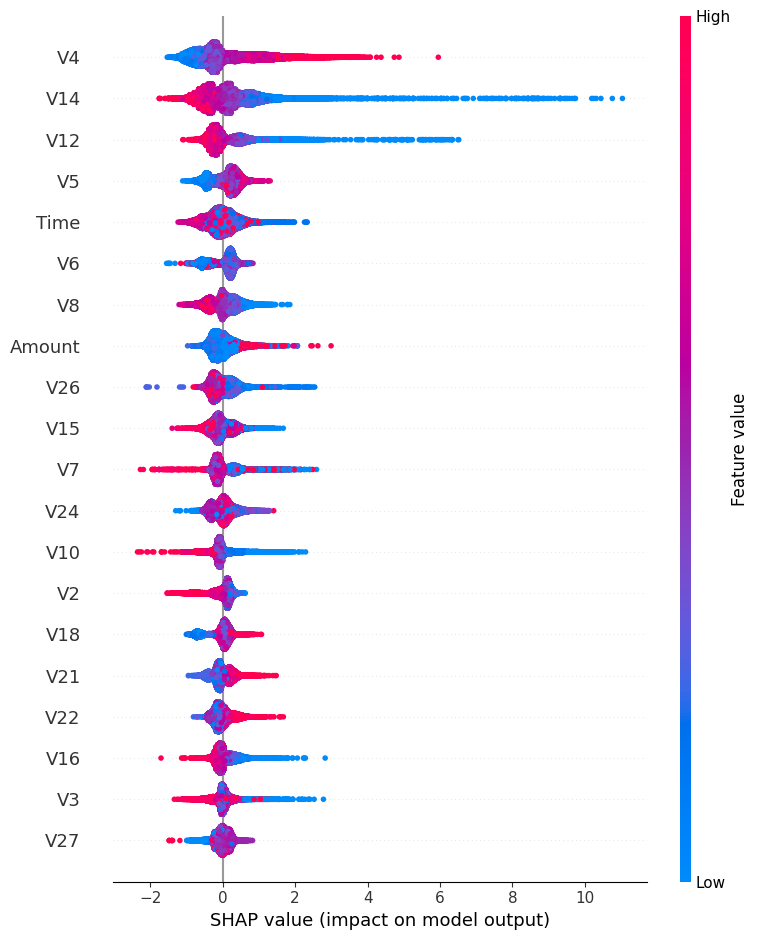

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [33]:
fearures = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

me = ModelExplainability( xg_model, x_train, x_test, fearures)
me.explain_with_shap()

In [ ]:
me.explain_with_lime()